# Netflix Exploratory Data Analysis

### Download the data

- Downloading the dataset using kaggle API Key

In [255]:
!pip install opendatasets --upgrade --quiet

In [256]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/shivamb/netflix-shows'
od.download(dataset_url)

Skipping, found downloaded files in ".\netflix-shows" (use force=True to force download)


### Data description

- **Source**: https://www.kaggle.com/shivamb/netflix-shows

- **About this Dataset**: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [258]:
file_path= './netflix-shows/netflix_titles.csv'
data = pd.read_csv(file_path
                 )
df=data.copy() ## copy of the orifinal data set

In [259]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


**Getting some basic information about the dataset**

In [260]:
data.head() #shows first 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [261]:
data.tail() #shows last 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [262]:
data.shape #shows number of rows and columns

(8807, 12)

In [263]:
data.size #shows total number of elements

105684

In [264]:
data.columns #shows column names

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [265]:
data.info() #shows data type of each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Here date_added is data type is object insted of date type so we need to convert it to date type

In [266]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [267]:
data['date_added']=pd.to_datetime(data['date_added'], format='mixed')


In [268]:
data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Here we can see that the date_added colum has been changed to date type

### Data preparation and cleaning

**Is there any duplicate rows in the dataset? If yes then remove the duplicate recordes.**

In [269]:
data[data.duplicated()] #shows duplicate rows 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [270]:
len(data[data.duplicated()])

0

No dupliaction found in the dataset.

In [271]:
#now in case we found any duplicates record then it can be removed by
data.drop_duplicates(inplace=True)

**Is there any null values in the dataset? If present clean it.**

In [272]:
data.isna().sum().sort_values(ascending=False) #shows number of missing values in each column

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

**Handeling Missing values**

In [273]:
data.fillna({'director':'Unavailable','cast':'Unavailable','country':'Unavailable','rating':'Unavailable'}, inplace=True)
data.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

For missing values in date added column we can fill in with the last date netfilx added the movie or tv show. Or another option is to drop the rows with missing values since the data is very small.

In [274]:
data[data.date_added.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unavailable,Igor Dmitriev,Unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [275]:
most_recent_date = data.date_added.max() #shows most recent date
data.fillna({'date_added':most_recent_date}, inplace=True)

In [276]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unavailable,Unavailable,Unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [277]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [278]:
data[data.duration.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Here we can see that due to human error ,the duration data is present in the rating column. We can also see that this error is only present in the movies whose director is Louis C.K.	
We nee to replace the duration data with the rating data.

In [279]:
data[data.director == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Check to make sur no other content with the same director  to avoid accidental overwriting .

In [280]:
data.loc[data['director'] == 'Louis C.K.', 'duration'] = data['rating']
data[data.director == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [281]:
data.loc[data['director'] == 'Louis C.K.', 'rating'] = 'Unavailable'
data[data.director == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


### Exploratory analysis and visualization

**1. Lets Check the type of content available on netflix**


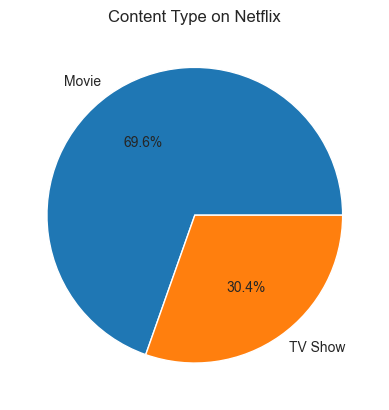

In [282]:
sns.set_style('darkgrid') 
content_type=data.type.value_counts()
plt.pie(content_type, labels=content_type.index, autopct='%1.1f%%');
plt.title('Content Type on Netflix');

From the above chart we can see there are more movies than tv shows on netflix.

**2. Countreis with most content on netflix**

In [283]:
country_content = data.country.value_counts().head(11)
country_content.drop('Unavailable', inplace=True)
country_content

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

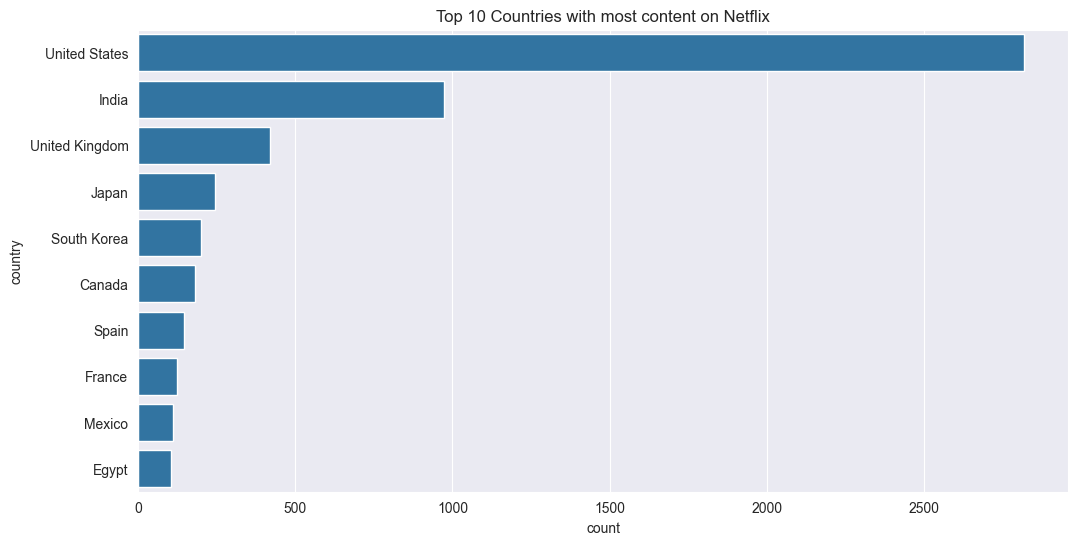

In [284]:
plt.figure(figsize=(12,6))
sns.countplot(y='country', data=data, order=country_content.index[0:10]);
plt.title('Top 10 Countries with most content on Netflix');

From the above chart we can see that United States has the most content on netflix followed by India and United Kingdom.

Here, we can also check the type of content in each country.


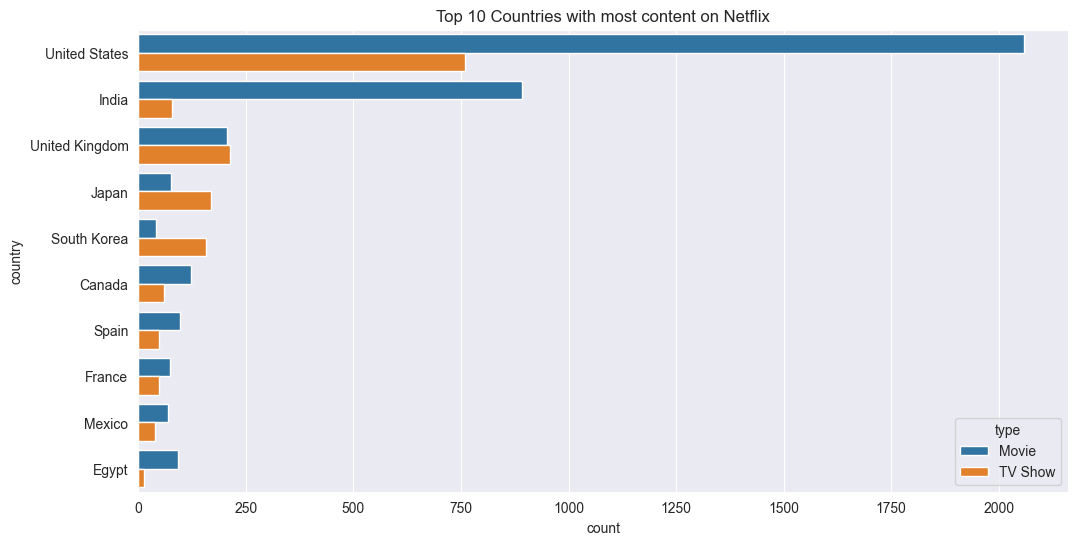

In [285]:
plt.figure(figsize=(12,6))
sns.countplot(y='country', data=data, order=country_content.index[0:10], hue='type');
plt.title('Top 10 Countries with most content on Netflix');

**3. Growth in content over the years**

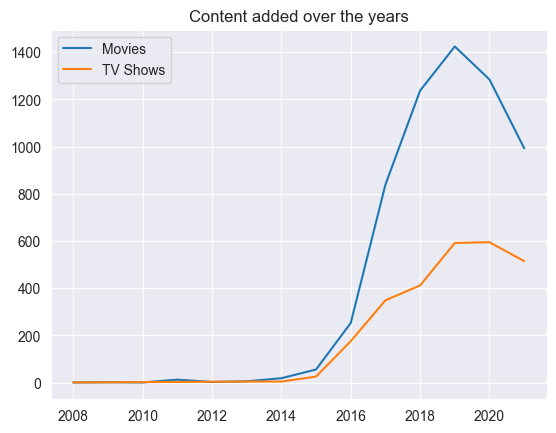

In [286]:
data['year_added'] = data.date_added.dt.year;
data['month_added'] = data.date_added.dt.month;
data['day_added'] = data.date_added.dt.day;
movies=data[data.type=='Movie']
tv_shows=data[data.type=='TV Show']
plt.plot(movies.groupby('year_added').size(), label='Movies');
plt.plot(tv_shows.groupby('year_added').size(), label='TV Shows');


plt.title("Content added over the years");
plt.legend(['Movies', 'TV Shows']);

The growth in number of movies on netflix is much higher than that od TV shows. About 1300 new movies were added in both 2018 and 2019. The growth in content started from 2013. Netflix kept on adding different movies and tv shows on its platform over the years. This content was of different variety - content from different countries, content which was released over the years. The growtth of content sees a dip in 2020, this could be due to the pandemic situation because of which the production of movies and tv shows was halted.

**4. Original release year of the content**

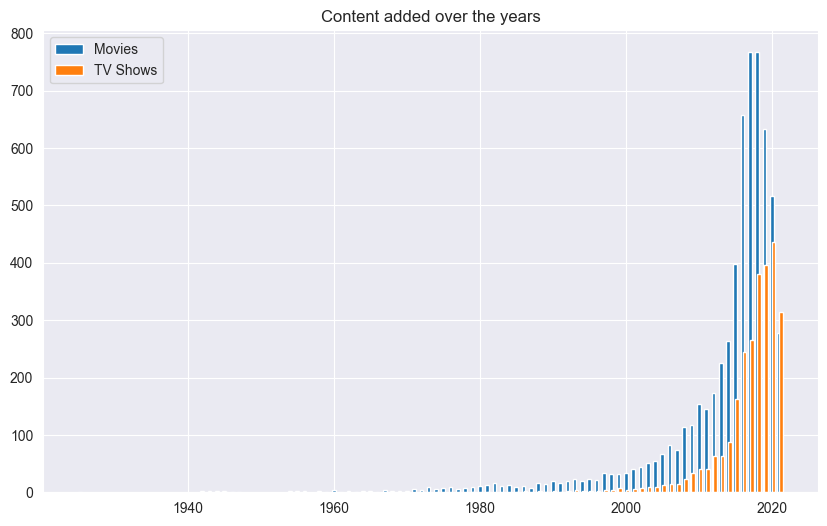

In [287]:
plt.figure(figsize=(10,6))
plt.bar(movies.groupby('release_year').size().index, movies.groupby('release_year').size().values,width=0.5, label="Bar 1", align="center");
plt.bar(tv_shows.groupby('release_year').size().index, tv_shows.groupby('release_year').size().values,width=0.5, label="Bar 2", align="edge");
plt.legend(['Movies', 'TV Shows']);
plt.title("Content added over the years");



Some of the oldest movies on netflix.

In [288]:

small = movies.sort_values("release_year", ascending = True)
small[['title', "release_year"]][:15]


,title,release_year
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
8436,The Negro Soldier,1944
8640,Tunisian Victory,1944
7575,Nazi Concentration Camps,1945
7219,Know Your Enemy - Japan,1945


Some of the oldest Tv shows on netflix.

In [289]:
small = tv_shows.sort_values("release_year", ascending = True)
small[['title', "release_year"]][:15]


,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
1331,Five Came Back: The Reference Films,1945
7743,Pioneers of African-American Cinema,1946
8541,The Twilight Zone (Original Series),1963
8189,The Andy Griffith Show,1967
4550,Monty Python's Fliegender Zirkus,1972
4551,Monty Python's Flying Circus,1974
6549,Dad's Army,1977
6674,El Chavo,1979
7588,Ninja Hattori,1981


**5. Distribution of movie duration**

Duration is in string and it includes season count also. We need to convert it to integer and remove the season count. We can store the season count by creating another column.


In [ ]:
df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if pd.notnull(x['duration']) and "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if pd.notnull(x['duration']) and "Season" not in x['duration'] else "", axis = 1)

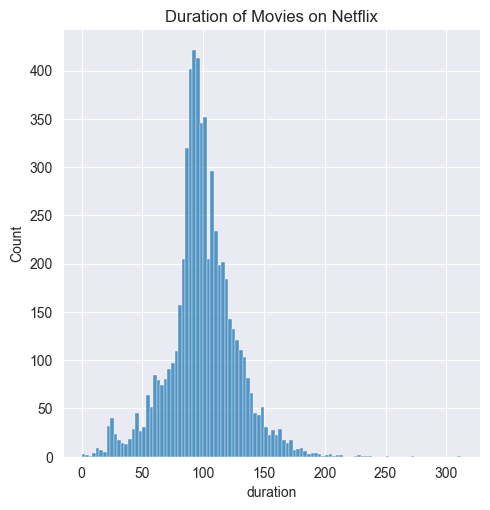

In [326]:
movies = df[df.type == 'Movie']
x1 = movies['duration'].replace('', '0.0').astype(float)
res = sns.displot(x1);
plt.title('Duration of Movies on Netflix');

### Summary And Conclusion

The Jupyter Notebook contains a series of visualizations and analyses performed on a dataset of Netflix shows. Here is a summary of the visualizations and analyses:

- **Content Type Distribution**: A pie chart shows the distribution of content types on Netflix. It reveals that movies make up around 69.5% of the content, while TV shows account for approximately 30.5%.

- **Countries with Most Content**: A bar chart displays the top 10 countries with the most content on Netflix. The United States has the highest number of content, followed by India and the United Kingdom.

- **Growth in Content Over the Years**: A line plot illustrates the growth in the number of movies and TV shows added to Netflix over the years. The plot shows a significant increase in the number of movies added, especially from 2013 onwards. The growth in TV shows is comparatively lower. The year 2020 shows a dip in content growth, possibly due to the impact of the COVID-19 pandemic.

- **Original Release Year of Content**: A bar chart showcases the distribution of content based on the original release year. It provides insights into the oldest movies and TV shows available on Netflix.

- **Distribution of Movie Duration**: A histogram presents the distribution of movie durations on Netflix. The duration is converted from a string format to a numerical value. The histogram helps visualize the range and frequency of movie durations.

These visualizations provide valuable insights into the content distribution, growth patterns, and characteristics of the Netflix dataset. The analyses performed include exploring the types of content, countries with the most content, growth trends over the years, and the distribution of movie durations.